<a href="https://colab.research.google.com/github/PsychopompusJY/COEN-244-ASSIGNMENT2-W2025/blob/main/Finalized_Term_Project_Airplane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction
-----------------------------------------------------------


In this study, we aim to determine the maximum mass an Airbus A380 can handle for takeoff on a runway of specific length, ensuring the aircraft does not overrun the available space. This analysis is crucial for emergency scenarios where the plane might land at a smaller airport and needs to take off again after refueling. The core idea involves identifying the runway distance required for takeoff, specifically the position where the lift force surpasses the gravitational pull on the plane. This can be approached through root-finding to determine the exact position. Key assumptions include considering constant lift and drag coefficients throughout most of the takeoff phase, treating thrust as a constant despite its variation with speed, and approximating the cross-sectional area of the fuselage as circular due to limited dimensional data. Additionally, friction between the airplane wheels and the runway is neglected, as it is minimal compared to the overall mass and does not significantly impact motion. We also assume the highest flap angle for takeoff, ensuring maximum lift coefficient.


Model and Numerical Methods
-----------------------------------------------------------


**Model:**

Figure 1 shows the forces that are exerted on the airplane during its acceleration on the runway towards takeoff. In the x-direction, the thrust coming from the engines pushes the aircraft forwards while the drag created by air resistance pushes it backwards. In the y-direction, the lift pushes the plane off the ground and the normal force is exerted by the ground onto the airplane so that the airplane does not sink into the ground. The gravitational force is due to the gravity of Earth, which attracts the plane towards the ground, downwards.

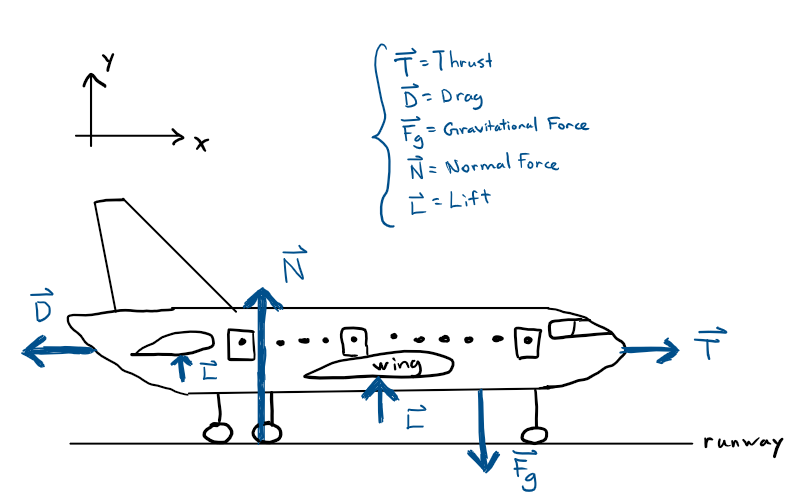

Figure 1. A free body diagram of the airplane and the forces acting upon it during its motion.





**Equations derived from the model:**

Based on the free body diagram, we derived equations to calculate the acceleration and the normal force as follows:

\begin{align}
  a_{x} = \left ( T_{x}-D_{x} - F_{r} \right)/m \tag{1}
\end{align}

\begin{align}
  N = mg - \frac{1}{2}\rho S C_{L}v^{2} \tag{2}
\end{align}

**Other equations that were used for calculations:**

These equations consists of the equations for the lift and drag forces, the equations for time, position and velocity (using Euler's method) and the equation for the rolling friction force.

\begin{align}
  L = \frac{1}{2}\rho A C_{L}v^{2} \tag{3}
\end{align}  
\begin{align}
  D = \frac{1}{2}\rho A C_{L}v^{2} \tag{4}
\end{align}    

\begin{align}
  t_{i+1} &= t_i + \Delta t \\ \tag{5}
\end{align}

\begin{align}
  x_{i+1} &= x_i + v_{x,i} \Delta t \\ \tag{6}
\end{align}

\begin{align}
  v_{x,i+1} &= v_{x,i} + a_{x,i} \Delta t \ \tag{7}
\end{align}

\begin{equation}
F_r = \mu_r N \tag{8}
\end{equation}




**Parameters:**


$m$ : Mass of the frisbee in kilograms.

$g$ : Acceleration due to gravity in m/s^2.

$rho$ : Air density in kg/m^3.

$A$ : Cross-sectional area of the airplane in m^2.

$S$ : Wing area of the airplane in m^2.

$T$ : Thrust provided by the engines in newtons.

$mu_r$ : rolling friction coefficient

These parameters are essential for calculating the forces acting on the airplane during takeoff.


**Initial Conditions:**

$x_0, y_0$ : Initial positions of the airplane in the x and y directions, respectively.

$v_0$ : Initial speed of the airplane in m/s.

These conditions define the starting state of the airplane's motion.



**Simulation:**

The simulation is conducted in discrete time steps using the provided time interval parameters (DT, T_MAX, STEPS).

An airplane usually takes around 1 minute to takeoff, but we put T_MAX as 120 seconds in case extra time is needed.


**Functions:**

motion_in_x Function:

This function calculates all the changing forces exerted on the airplane during takeoff. Specifically, it calculates the following components over time: velocity, position, acceleration, drag and lift forces and finally the normal force.

It uses a for loop to update these variables that change over time and then has an if else statement that breaks the function once the normal force has reached 0. At that point, the airplane takes off and we are not evaluating the motion of the plane after it has started flying.




root_finding_airplane Function and Plotting:



**Variables for air resistance and lift:**

The constants CL, CD, S, A are included for aerodynamic calculations. They are chosen based on the characteristics of the specific aircraft we have chosen for this simulation (Airbus A380).

**Explanation of the code:**

To begin, our first task was creating a code capable of computing all relevant forces impacting the airplane throughout our simulation. This initial phase revolved around constructing a for loop to systematically calculate normal, drag, and lift forces, alongside acceleration, velocity, and position at each time step. These forces were derived from the creation of a comprehensive free body diagram of the airplane. By examining the net force, we derived equations concerning acceleration and the normal force. Meanwhile, established equations governed lift and drag. This groundwork allowed us to generate a plot depicting the relationship between the normal force and the airplane's positional changes over time.

Next, we developed a new function tasked with plotting the mass of the plane against the required takeoff distance. This function calculates across a range of different masses and gives us the takeoff distance for each situation. Defined as the point at which the normal force reaches zero, the takeoff distance represents a critical data in our analysis. Our objective was to optimize this function with respect to the plane's mass, seeking the highest feasible mass that still permits takeoff within the available runway length.

To accomplish this optimization, we employed root-finding techniques on the newly constructed function, which correlates mass with takeoff distance. Through this iterative process, we successfully identified the maximum mass the airplane can support while still achieving liftoff before exhausting the runway's length.


Validation
---


Our code does not give us accurate results. This is due to the many assumptions that we have made.

We validate our first function that plots the normal force vs. the position in x for the airplane. A fully loaded Airbus A380 takes about 3000 meters to takeoff (Simple Flying).

Safety margins are around at least 500 meters above how much distance the aircraft actually needs to takeoff (Aviation Stack Exchange).

Therefore, we can say that an Airbus A380 needs approximately 2500 meters to takeoff. Our code returns a result of 1822 meters for takeoff, so our error resides in the same magnitude as the real answer, with a factor lower than 2.


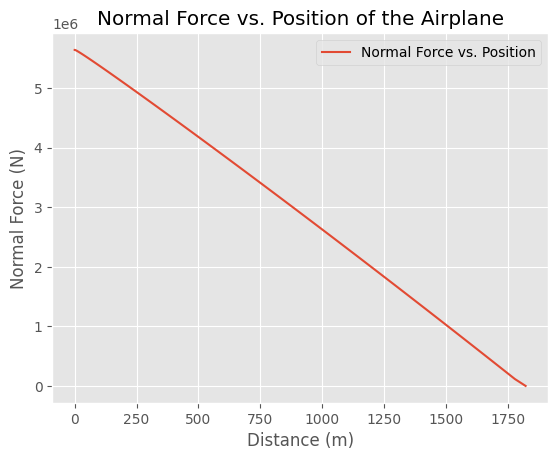

The airplane lands at 1822.5655550589895 meters.


In [ ]:
import math
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Constants
CL = 1.52  # Max lift coefficient
CD = 0.0265  # Drag coefficient

m = 575155  # Max takeoff weight in kg
g = 9.81  # Gravitational field

T = 1245502.05  # Max thrust in N

A = math.pi * (7.1 / 2) ** 2  # Cross-sectional area of the aircraft in m^2
S = 845  # Wing area in m^2

rho = 1.225  # Air density in kg/m^3

# Rolling friction coefficient
mu_r = 0.02  # Example value, you can adjust this

# Initial Conditions
x_0 = 0  # Initial position in x in meters
y_0 = 0  # Initial position in y in meters
v_0 = 0  # Initial speed in m/s

# Constants for time interval
DT = 0.5
  # Time step
T_MAX = 120.0  # Max time of the simulation
STEPS = int(T_MAX / DT)  # Number of steps in the simulation

def motion_in_x(x_0, y_0, v_0):
    vx_0 = 0
    Rx_0 = 0
    D_0 = 0.5 * CD * rho * A * (vx_0 ** 2)
    L_0 = 0.5 * CL * rho * S * (vx_0 ** 2)
    N_0 = m * g
    Fr_0 = mu_r * N_0
    ax_0 = (T - D_0 - Fr_0) / m

    vx = [vx_0]
    Rx = [Rx_0]
    D = [D_0]
    L = [L_0]
    N = [N_0]
    Fr = [Fr_0]
    ax = [ax_0]

    # Updates
    for i in range(STEPS):
        vx.append(vx[i] + (ax[i] * DT))
        D.append(0.5 * CD * rho * A * (vx[i] ** 2))
        L.append(0.5 * CL * rho * S * (vx[i] ** 2))
        N.append(m * g - L[i])
        Fr.append(mu_r * N[i])
        ax.append((T - D[i] - Fr[i]) / m)
        Rx.append(Rx[i] + vx[i] * DT)

        if N[-1] < 1:
            N[-1] = 0
            break

    return Rx, N

Rx, N = motion_in_x(x_0, y_0, v_0)

# Plotting
plt.plot(Rx, N, label='Normal Force vs. Position')
plt.legend()
plt.title("Normal Force vs. Position of the Airplane")
plt.xlabel("Distance (m)")
plt.ylabel("Normal Force (N)")
plt.show()
print(f'The airplane lands at {Rx[-1]} meters.')


**Convergence testing**

Convergence testing shows us that the best DT would be 0.5

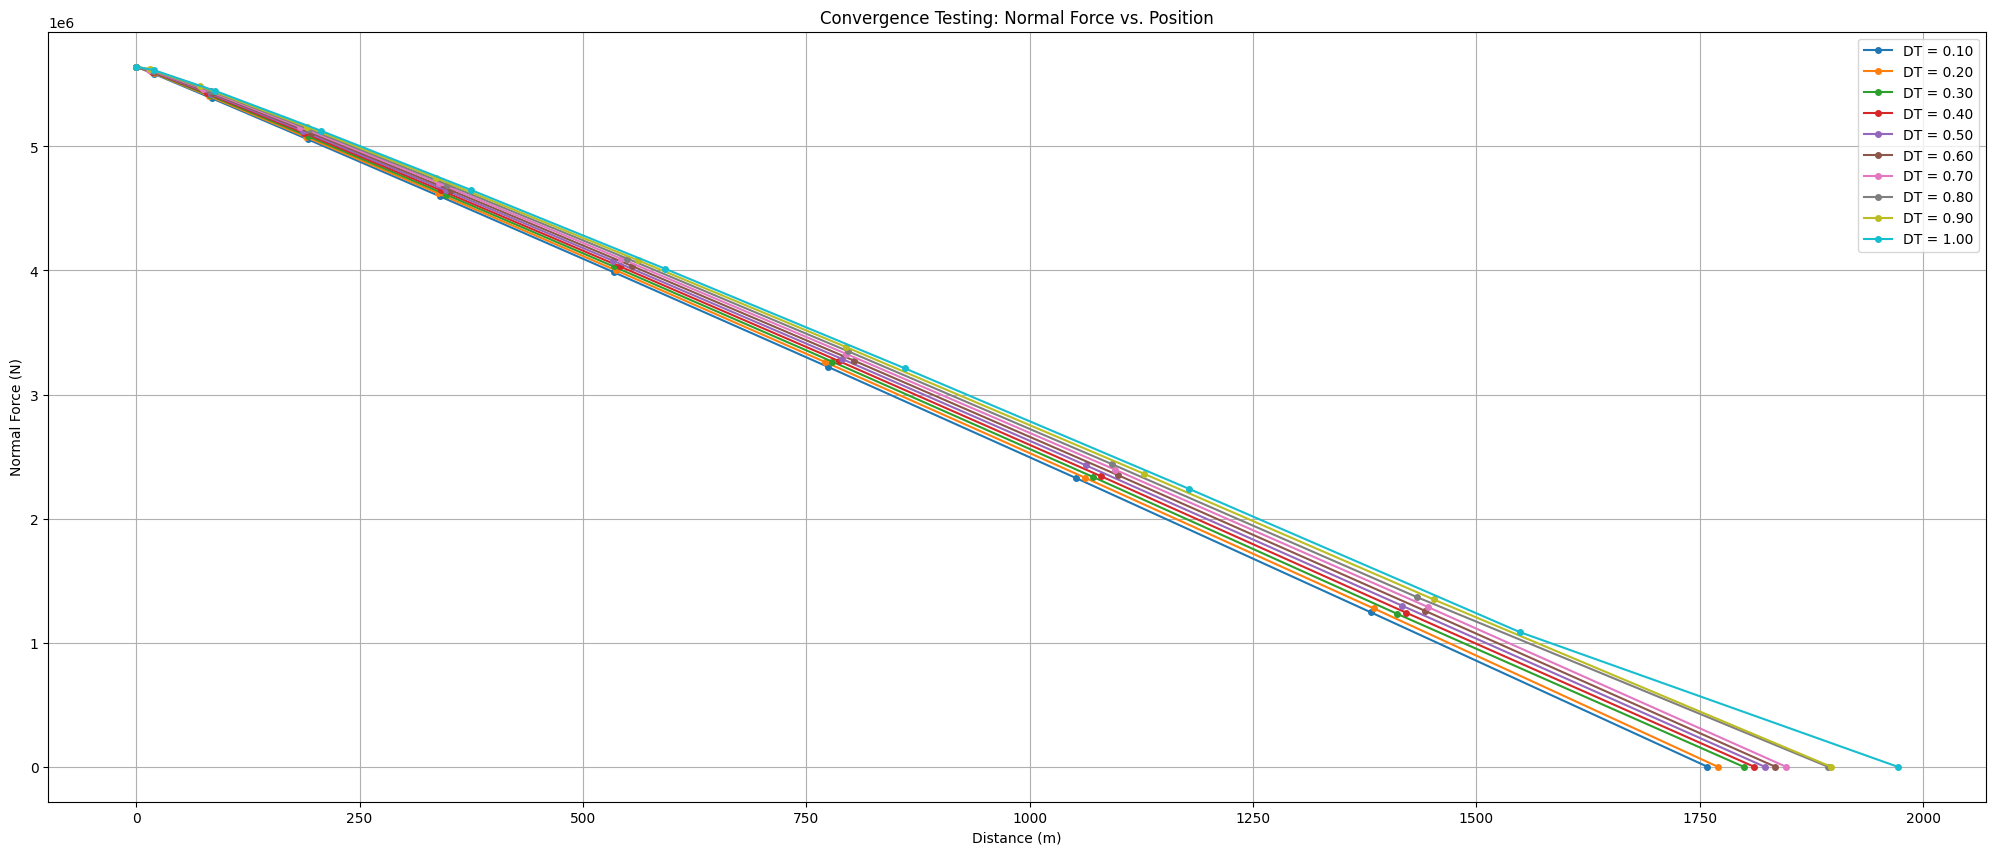

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Constants
CL = 1.52  # Max lift coefficient
CD = 0.0265  # Drag coefficient

m = 575155  # Max takeoff weight in kg
g = 9.81  # Gravitational field

T = 1245502.05  # Max thrust in N

A = math.pi * (7.1 / 2) ** 2  # Cross-sectional area of the aircraft in m^2
S = 845  # Wing area in m^2

rho = 1.225  # Air density in kg/m^3

# Rolling friction coefficient
mu_r = 0.02  # Example value, you can adjust this

# Initial Conditions
x_0 = 0  # Initial position in x in meters
y_0 = 0  # Initial position in y in meters
v_0 = 0  # Initial speed in m/s

# Constants for time interval
T_MAX = 120.0  # Max time of the simulation

def motion_in_x(x_0, y_0, v_0, DT):
    STEPS = int(T_MAX / DT)  # Number of steps in the simulation

    vx_0 = 0
    Rx_0 = 0
    D_0 = 0.5 * CD * rho * A * (vx_0 ** 2)
    L_0 = 0.5 * CL * rho * S * (vx_0 ** 2)
    N_0 = m * g
    Fr_0 = mu_r * N_0
    ax_0 = (T - D_0 - Fr_0) / m

    vx = [vx_0]
    Rx = [Rx_0]
    D = [D_0]
    L = [L_0]
    N = [N_0]
    Fr = [Fr_0]
    ax = [ax_0]

    # Updates
    for i in range(STEPS):
        vx.append(vx[i] + (ax[i] * DT))
        D.append(0.5 * CD * rho * A * (vx[i] ** 2))
        L.append(0.5 * CL * rho * S * (vx[i] ** 2))
        N.append(m * g - L[i])
        Fr.append(mu_r * N[i])
        ax.append((T - D[i] - Fr[i]) / m)
        Rx.append(Rx[i] + vx[i] * DT)

        if N[-1] < 1:
            N[-1] = 0
            break

    return Rx, N

# Define range of time steps for convergence testing
DT_range = np.arange(0.1, 1.1, 0.1)

# Lists to store results
convergence_data = []

# Perform simulations for each time step
for DT in DT_range:
    Rx, N = motion_in_x(x_0, y_0, v_0, DT)
    convergence_data.append((Rx, N, DT))

# Plot convergence
plt.figure(figsize=(25, 10))
for i, (Rx, N, DT) in enumerate(convergence_data):
    marker_indices = np.linspace(0, len(Rx) - 1, 10, dtype=int)  # Marker indices spaced evenly
    plt.plot(np.array(Rx)[marker_indices], np.array(N)[marker_indices], marker='o', linestyle='-', markersize=4, label=f'DT = {DT:.2f}')
plt.legend()
plt.title("Convergence Testing: Normal Force vs. Position")
plt.xlabel("Distance (m)")
plt.ylabel("Normal Force (N)")
plt.grid(True)
plt.show()


Result and Discussion
---



**List of assumptions:**

First, we took the drag and lift coefficients as constants but in reality, these are not constants. Our values for the drag and lift coefficients are also not accurate since these depend on a lot of different factors like weather and different sources online show different coefficient values for the Airbus A380.

Second, we assumed the plane will use max thrust throughout the entirety of takeoff, but this is not what happens in real-life situations. A source tells us that "if the mass of air and fuel is held constant, thrust will decrease as airspeed increases" (Aerospace Notes).

Third, we assume the cross-sectional area of the airplane to consist of the fuselage and we approximated it using the diameter of the cabin and calculting it as a circle even though the cross-sectional area includes the engines and the wings.

Fourth, the coefficient of rolling friction for the airplane is not accurate, since we could not find much data on our aircraft model for the friction on the tires. We used a general coefficient of friction that fits most aircrafts.

Fifth, the runway requirements shown include a safety margin which is not precisely and our code does not include the safety margin for airplanes.

**Graph representing the maximum weight an Airbus A380 can take on on a runway of 1500 meters:**


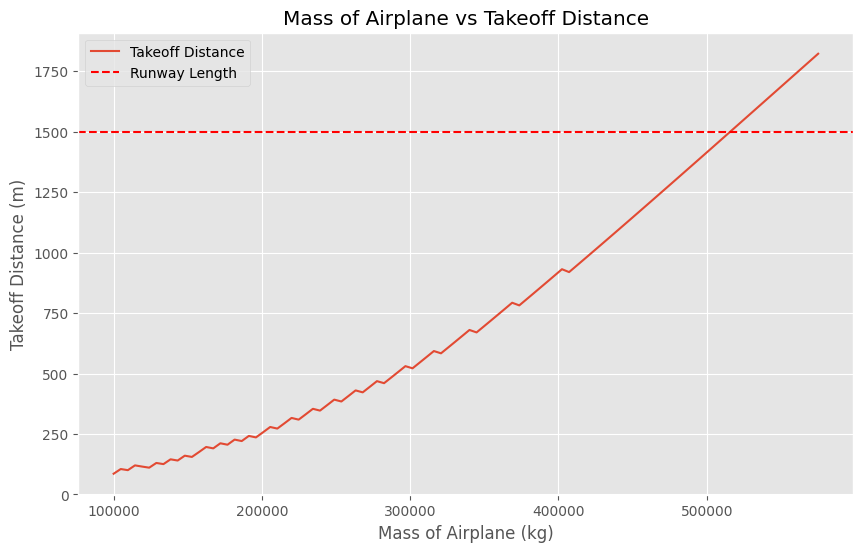

Maximum takeoff mass within runway length: 512760.9090909091 kg


In [ ]:
import numpy as np
from scipy.optimize import bisect
import matplotlib.pyplot as plt

# Constants
CL = 1.52  # Max lift coefficient
CD = 0.0265  # Drag coefficient

m = 575155  # Max takeoff weight in kg
g = 9.81  # Gravitational field

T = 1245502.05  # Max thrust in N

A = math.pi * (7.1 / 2) ** 2  # Cross-sectional area of the aircraft in m^2
S = 845  # Wing area in m^2

rho = 1.225  # Air density in kg/m^3

# Rolling friction coefficient
mu_r = 0.02  # Example value, you can adjust this

# Initial Conditions
x_0 = 0  # Initial position in x in meters
y_0 = 0  # Initial position in y in meters
v_0 = 0  # Initial speed in m/s

# Constants for time interval
T_MAX = 120.0  # Max time of the simulation

# Function to simulate motion in x direction
def motion_in_x(x_0, y_0, v_0, m):
    vx_0 = v_0
    Rx_0 = x_0
    D_0 = 0.5 * CD * rho * A * (vx_0 ** 2)
    L_0 = 0.5 * CL * rho * S * (vx_0 ** 2)
    N_0 = m * g
    Fr_0 = mu_r * N_0
    ax_0 = (T - D_0 - Fr_0) / m

    vx = [vx_0]
    Rx = [Rx_0]
    D = [D_0]
    L = [L_0]
    N = [N_0]
    Fr = [Fr_0]
    ax = [ax_0]

    for i in range(STEPS):
        vx.append(vx[i] + (ax[i] * DT))
        D.append(0.5 * CD * rho * A * (vx[i] ** 2))
        L.append(0.5 * CL * rho * S * (vx[i] ** 2))
        N.append(m * g - L[i])
        Fr.append(mu_r * N[i])
        ax.append((T - D[i] - Fr[i]) / m)
        Rx.append(Rx[i] + vx[i] * DT)

        if N[-1] < 1:
            N[-1] = 0
            break

    return Rx, vx, ax, list(np.arange(0, DT*len(Rx), DT)), N

# Function to find the maximum mass that allows takeoff within the runway length
def root_finding_airplane(runway_length, mass_range, num_points=100):
    min_mass, max_mass = mass_range
    masses = np.linspace(min_mass, max_mass, num_points)
    takeoff_distances = []

    for m in masses:
        positions, _, _, _, normal_forces = motion_in_x(x_0, y_0, v_0, m)
        takeoff_distance = positions[-1] if normal_forces[-1] <= 0 else float('inf')
        takeoff_distances.append(takeoff_distance)

    # Find the maximum mass that allows takeoff within the runway length
    max_mass_takeoff = max(m for m, d in zip(masses, takeoff_distances) if d <= runway_length)

    # Plot mass vs takeoff distance
    plt.figure(figsize=(10, 6))
    plt.plot(masses, takeoff_distances, label='Takeoff Distance')
    plt.axhline(runway_length, color='r', linestyle='--', label='Runway Length')
    plt.xlabel('Mass of Airplane (kg)')
    plt.ylabel('Takeoff Distance (m)')
    plt.title('Mass of Airplane vs Takeoff Distance')
    plt.legend()
    plt.grid(True)
    plt.show()

    return max_mass_takeoff

# Example usage
runway_length = 1500  # runway length in meters
mass_range = (1e5, 575155)  # range of masses to test (min_mass, max_mass)

max_takeoff_mass = root_finding_airplane(runway_length, mass_range)
print(f"Maximum takeoff mass within runway length: {max_takeoff_mass} kg")



The simulation shows that the maximum mass the Airbus A380 can handle for takeoff within a 1500-meter runway is calculated. The plot indicates that as the mass increases, the required takeoff distance increases significantly. The specific mass value where the takeoff distance equals the runway length represents the critical mass for safe takeoff.










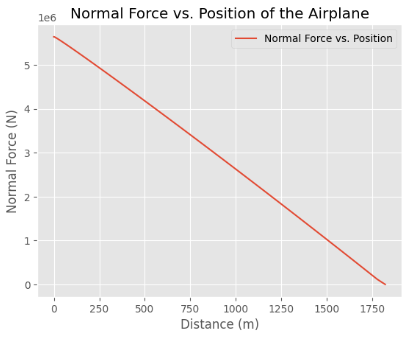

Refer to the Normal vs Position graph, As the airplane accelerates along the runway, its speed 𝑣 increases, leading to an increase in the lift force 𝐿. This causes the normal force 𝑁 to decrease. The point where the normal force reaches zero indicates that the lift force is equal to the weight of the airplane, and the airplane is ready to lift off.

The validation of the simulation results against real-world data reveals that our model, while not perfectly accurate, provides a reasonable approximation. Our code returned a takeoff distance of approximately 1822 meters for a fully loaded Airbus A380, whereas the actual takeoff distance is around 2500 meters. Despite our assumptions leading to a discrepancy, the error margin remains within a reasonable factor.

There are many values we could not find due to the lack of time. We found the importance of accurate coefficients; using precise values for drag and lift coefficients, specific to the aircraft model and conditions, would enhance the accuracy of our simulation. Incorporating a more realistic thrust profile that decreases with increasing airspeed could yield more accurate results. A more comprehensive calculation of the cross-sectional area, including wings and engines, would better represent aerodynamic forces. Obtaining specific rolling friction data for the Airbus A380 would improve the realism of our model. Adding safety margins into our runway length calculations would align our results closer to practical aviation standards.

Overall, while our model provides valuable insights, further refinements and more accurate data inputs are essential for precise determination of the maximum takeoff mass of an Airbus A380 on a specified runway length.


Conclusion
---


In our study, we constructed a simplified model to assess the maximum takeoff mass of an Airbus A380 on a specific runway length, considering forces like thrust, drag, and lift. Despite assumptions regarding constant coefficients and simplified cross-sectional area calculations, our simulations yielded valuable insights. We found that as the aircraft's mass increases, the required takeoff distance also rises significantly. For a 1500-meter runway, our model estimated a maximum takeoff mass of approximately 512760.9 kg. However, further refinements are needed, including incorporating variable coefficients, realistic thrust profiles, and safety margins, to enhance the accuracy of our model and align it more closely with real-world aviation standards.

References
---

**Sources used in *Validation***

"Factors Affecting Thrust – Airspeed." Aerospace Notes, www.aerospacenotes.com/propulsion-1/factors-affecting-thrust/. Accessed 24 May 2024.

Sumit Singh. "The Shortest Takeoff Distance For Passenger Planes." Simple Flying, www.simpleflying.com/shortest-takeoff-distance-passenger-planes/. Accessed 24 May 2024.

"How Long Does a Runway Have to Be for an Airbus A380 to Takeoff?" Aviation Stack Exchange, aviation.stackexchange.com/questions/56990/how-long-does-a-runway-have-to-be-for-an-airbus-a380-to-takeoff. Accessed 24 May 2024.


**Sources used to find the values of the parameters for the Airbus A380**

Airbus. "Airbus A380 Facts and Figures." January 2022, www.airbus.com/sites/g/files/jlcbta136/files/2022-01/EN-Airbus-A380-Facts-and-Figures-January-2022.pdf. Accessed 24 May 2024.

"Title of the Article." Global Journal of Engineering Science and Researches, vol. 4, no. 2, 2019, pp. 120-125, www.gjesr.com/Issues%20PDF/COTII%202019/13.pdf. Accessed 24 May 2024.

"Aerodynamics for Students: Take-Off and Landing." Aerodynamics for Students, www.aerodynamics4students.com/aircraft-performance/take-off-and-landing.php. Accessed 24 May 2024.

"Airbus A380 Specifications." GlobalAir.com, www.globalair.com/aircraft-for-sale/specifications?specid=1545. Accessed 24 May 2024.

**Other sources**

Lutze, Frederick H. "Thrust Models." Virginia Tech, www.archive.aoe.vt.edu/lutze/AOE3104/thrustmodels.pdf. Accessed 24 May 2024.

"Rolling Friction." Collegedunia, www.collegedunia.com/exams/rolling-friction-physics-articleid-892. Accessed 24 May 2024.